In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
flowers = pd.read_csv("flowers.csv")
#Dataset Overview

In [3]:
flowers.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
flowers.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
flowers.shape

(150, 5)

In [7]:
flowers.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
flowers.dtypes

,0
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [9]:
flowers.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [10]:
flowers.nunique()

,0
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


In [11]:
# Data Quality Check
flowers.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [12]:
flowers.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [14]:
flowers[flowers.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [15]:

flowers = flowers.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [16]:
# Data Cleaning
print("\nMissing values count:\n", flowers.isnull().sum())



Missing values count:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [18]:
flowers = flowers.dropna()


In [19]:
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in num_cols:
    flowers[col].fillna(flowers[col].mean(), inplace=True)


/tmp/ipython-input-1246318386.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flowers[col].fillna(flowers[col].mean(), inplace=True)


In [20]:
flowers['Species'].fillna(flowers['Species'].mode()[0], inplace=True)


/tmp/ipython-input-2422681740.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flowers['Species'].fillna(flowers['Species'].mode()[0], inplace=True)


In [21]:
print("\nAfter handling missing data:\n", flowers.isnull().sum())



After handling missing data:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [22]:
print("\nNumber of duplicate rows:", flowers.duplicated().sum())


Number of duplicate rows: 3


In [23]:
duplicate_rows = flowers[flowers.duplicated()]
print("\nDuplicate rows:\n", duplicate_rows)


Duplicate rows:
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
34             4.9           3.1            1.5           0.1     Iris-setosa
37             4.9           3.1            1.5           0.1     Iris-setosa
142            5.8           2.7            5.1           1.9  Iris-virginica


In [25]:
flowers = flowers.drop_duplicates()

print("\nAfter removing duplicates, new shape:", flowers.shape)


After removing duplicates, new shape: (147, 5)


In [27]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in numeric_cols:
    invalid_rows =flowers[(flowers[col] <= 0) | (flowers[col] > 10)]
    if not invalid_rows.empty:
        print(f"Incorrect values in {col}:\n", invalid_rows)


In [28]:
print(flowers.dtypes)


SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [29]:
for col in numeric_cols:
    flowers[col] = pd.to_numeric(flowers[col], errors='coerce')

In [31]:
print(flowers['Species'].unique())


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [32]:
for col in numeric_cols:
    mean_val = flowers[col].mean()
    flowers.loc[(flowers[col] <= 0) | (flowers[col] > 10), col] = mean_val

In [34]:
flowers = flowers[(flowers['SepalLengthCm'] > 0) & (flowers['SepalLengthCm'] < 10)]
flowers = flowers[(flowers['SepalWidthCm'] > 0) & (flowers['SepalWidthCm'] < 10)]
flowers = flowers[(flowers['PetalLengthCm'] > 0) & (flowers['PetalLengthCm'] < 10)]
flowers = flowers[(flowers['PetalWidthCm'] > 0) & (flowers['PetalWidthCm'] < 10)]


In [35]:
print("\nAfter cleaning:\n", flowers.describe())
print("\nUnique Species:\n", flowers['Species'].unique())



After cleaning:
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     147.000000    147.000000     147.000000    147.000000
mean        5.856463      3.055782       3.780272      1.208844
std         0.829100      0.437009       1.759111      0.757874
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.400000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

Unique Species:
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [36]:
flowers.columns = flowers.columns.str.strip()


In [37]:
flowers = flowers.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [38]:
flowers['Species'] = flowers['Species'].str.lower()


In [39]:
flowers['Species'] = flowers['Species'].str.title()


In [40]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

flowers[numeric_cols] = flowers[numeric_cols].round(2)


In [41]:
flowers.columns = flowers.columns.str.lower().str.replace(' ', '_')


In [43]:
print(flowers.head())
print(flowers.columns)


   sepallengthcm  sepalwidthcm  petallengthcm  petalwidthcm      species
0            5.1           3.5            1.4           0.2  Iris-Setosa
1            4.9           3.0            1.4           0.2  Iris-Setosa
2            4.7           3.2            1.3           0.2  Iris-Setosa
3            4.6           3.1            1.5           0.2  Iris-Setosa
4            5.0           3.6            1.4           0.2  Iris-Setosa
Index(['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')


In [67]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [69]:
min_values = flowers[numeric_cols].min()
max_values = flowers[numeric_cols].max()


In [70]:
summary_minmax = pd.DataFrame({
    'Minimum': min_values,
    'Maximum': max_values
})

print("Minimum and Maximum values:\n")
print(summary_minmax)


Minimum and Maximum values:

              Minimum        Maximum
SepalLengthCm     4.3  SepalLengthCm
SepalWidthCm      2.0   SepalWidthCm
PetalLengthCm     1.0  PetalLengthCm
PetalWidthCm      0.1   PetalWidthCm


In [76]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [77]:
print(flowers[numeric_cols].info())
print("\nAny missing values?\n", flowers[numeric_cols].isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SepalLengthCm  151 non-null    object
 1   SepalWidthCm   151 non-null    object
 2   PetalLengthCm  151 non-null    object
 3   PetalWidthCm   151 non-null    object
dtypes: object(4)
memory usage: 4.8+ KB
None

Any missing values?
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


In [78]:
flowers[numeric_cols] = flowers[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [79]:
flowers[numeric_cols] = flowers[numeric_cols].fillna(flowers[numeric_cols].mean())

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
flowers_standard = flowers.copy()
flowers_standard[numeric_cols] = scaler.fit_transform(flowers[numeric_cols])

print("After Standard Scaling:\n")
print(flowers_standard.head())


After Standard Scaling:

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1.079768e-15  1.031055e-15       0.000000      0.000000      Species
1  -9.036785e-01  1.035492e+00      -1.345736     -1.317346  Iris-setosa
2  -1.146821e+00 -1.253734e-01      -1.345736     -1.317346  Iris-setosa
3  -1.389963e+00  3.389726e-01      -1.402791     -1.317346  Iris-setosa
4  -1.511534e+00  1.067996e-01      -1.288681     -1.317346  Iris-setosa


In [81]:
from scipy.stats import boxcox

flowers_boxcox = flowers.copy()
for col in numeric_cols:
    flowers_boxcox[col], _ = boxcox(flowers[col] + 1e-3)  # Add small value to avoid zero

print("After Box-Cox Transformation:\n")
print(flowers_boxcox.head())


After Box-Cox Transformation:

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0       1.564183      1.299072       2.624129      0.193253      Species
1       1.456923      1.485462       0.396538     -0.996207  Iris-setosa
2       1.424995      1.275171       0.396538     -0.996207  Iris-setosa
3       1.391547      1.362172       0.298412     -0.996207  Iris-setosa
4       1.374209      1.319188       0.494223     -0.996207  Iris-setosa


In [82]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
flowers['Species_encoded'] = encoder.fit_transform(flowers['Species'])

print(flowers[['Species', 'Species_encoded']].head())


       Species  Species_encoded
0      Species                3
1  Iris-setosa                0
2  Iris-setosa                0
3  Iris-setosa                0
4  Iris-setosa                0


In [83]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [84]:
Q1 = flowers[numeric_cols].quantile(0.25)
Q3 = flowers[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):\n", IQR)


Interquartile Range (IQR):
 SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
dtype: float64


In [85]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [86]:
outliers = ((flowers[numeric_cols] < lower_bound) | (flowers[numeric_cols] > upper_bound))
print("\nNumber of outliers in each column:\n", outliers.sum())



Number of outliers in each column:
 SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


In [87]:
flowers_iqr = flowers[~((flowers[numeric_cols] < lower_bound) | (flowers[numeric_cols] > upper_bound)).any(axis=1)]


In [88]:
print("\nOriginal shape:", flowers.shape)
print("After removing outliers:", flowers_iqr.shape)



Original shape: (151, 6)
After removing outliers: (147, 6)


In [89]:
flowers[numeric_cols].describe()
flowers_iqr[numeric_cols].describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856757,3.037102,3.807202,1.219719
std,0.831233,0.393792,1.751094,0.757758
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [90]:
import pandas as pd
from scipy import stats

numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [91]:
z_scores = stats.zscore(flowers[numeric_cols])

In [92]:
z_scores_df = pd.DataFrame(z_scores, columns=numeric_cols)
print(z_scores_df.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1.079768e-15  1.031055e-15       0.000000      0.000000
1  -9.036785e-01  1.035492e+00      -1.345736     -1.317346
2  -1.146821e+00 -1.253734e-01      -1.345736     -1.317346
3  -1.389963e+00  3.389726e-01      -1.402791     -1.317346
4  -1.511534e+00  1.067996e-01      -1.288681     -1.317346


In [93]:
threshold = 3
outliers = (abs(z_scores_df) > threshold)
print("\nNumber of outliers in each column:\n", outliers.sum())



Number of outliers in each column:
 SepalLengthCm    0
SepalWidthCm     1
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


In [94]:
flowers_z = flowers[(abs(z_scores_df) < threshold).all(axis=1)]

print("\nOriginal shape:", flowers.shape)
print("After removing outliers:", flowers_z.shape)



Original shape: (151, 6)
After removing outliers: (150, 6)


In [95]:
print("\nBefore:\n", flowers[numeric_cols].describe())
print("\nAfter:\n", flowers_z[numeric_cols].describe())



Before:
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     151.000000    151.000000     151.000000    151.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.825301      0.432147       1.758529      0.760613
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.300000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

After:
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.844289      3.045027       3.773724      1.203991
std         0.827982      0.419242       1.754626      0.760332
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000 

In [96]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


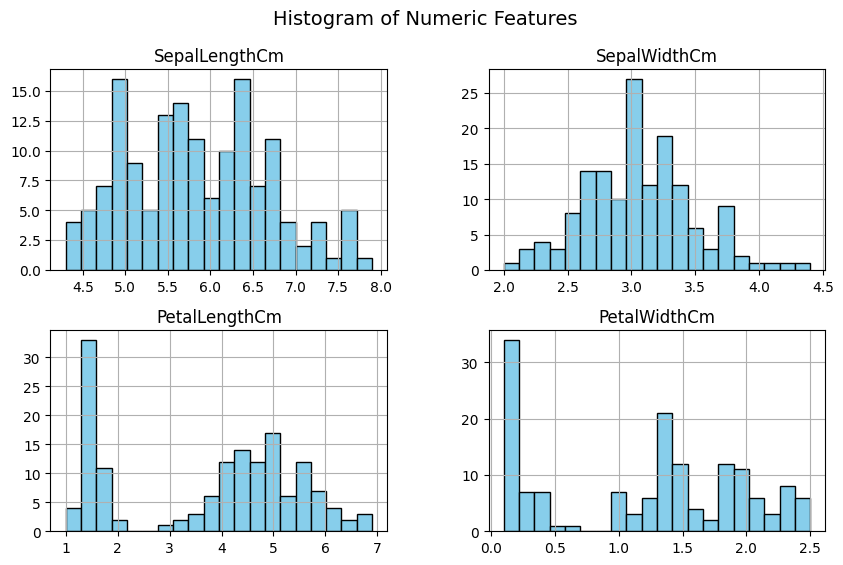

In [97]:
flowers[numeric_cols].hist(bins=20, figsize=(10,6), color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Numeric Features", fontsize=14)
plt.show()


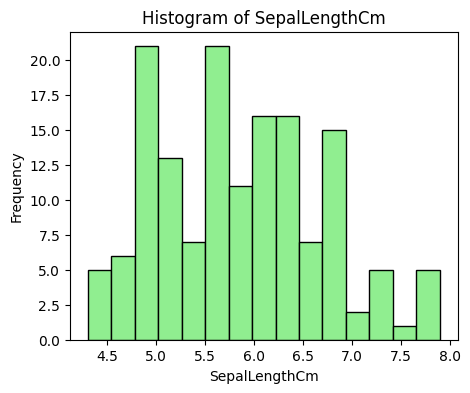

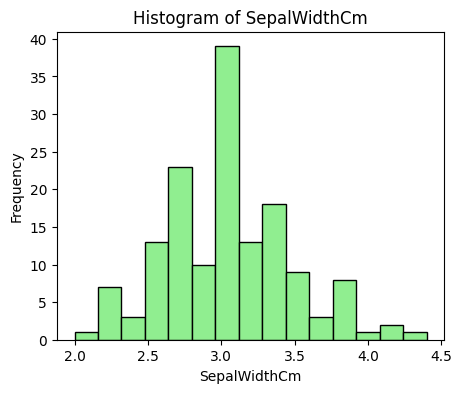

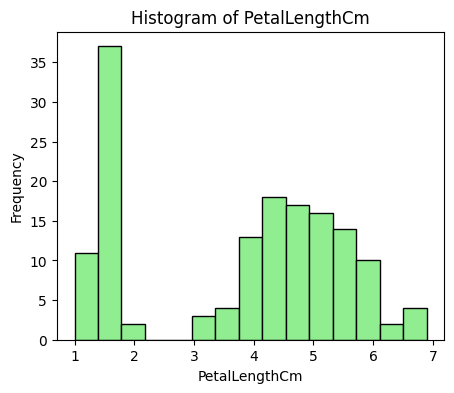

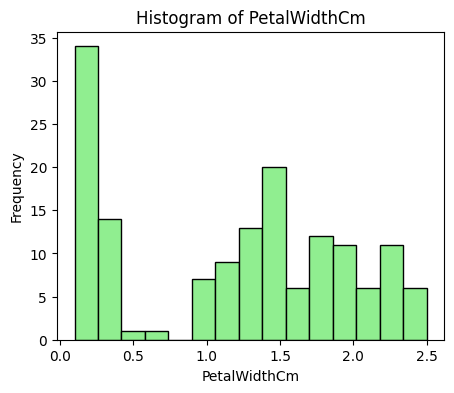

In [98]:
for col in numeric_cols:
    plt.figure(figsize=(5,4))
    plt.hist(flowers[col], bins=15, color='lightgreen', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


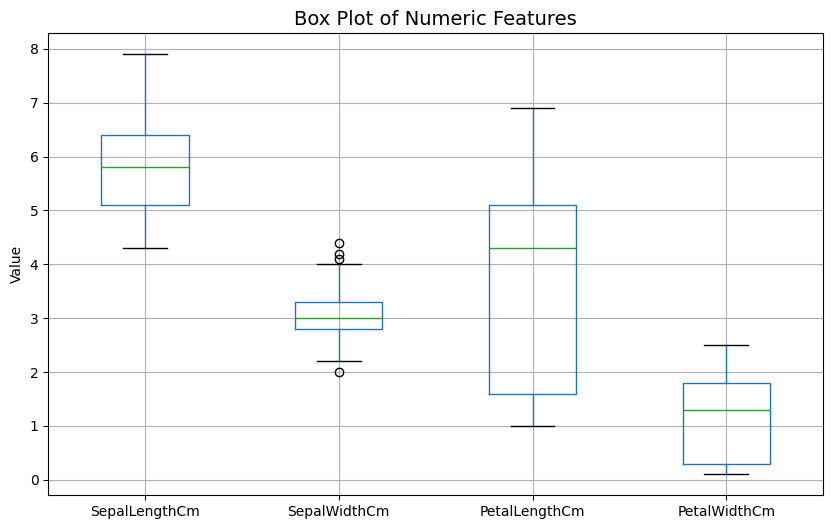

In [99]:
plt.figure(figsize=(10,6))
flowers.boxplot(column=numeric_cols)
plt.title("Box Plot of Numeric Features", fontsize=14)
plt.ylabel("Value")
plt.show()


/tmp/ipython-input-2709829765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='SepalLengthCm', data=flowers, palette='Set2')


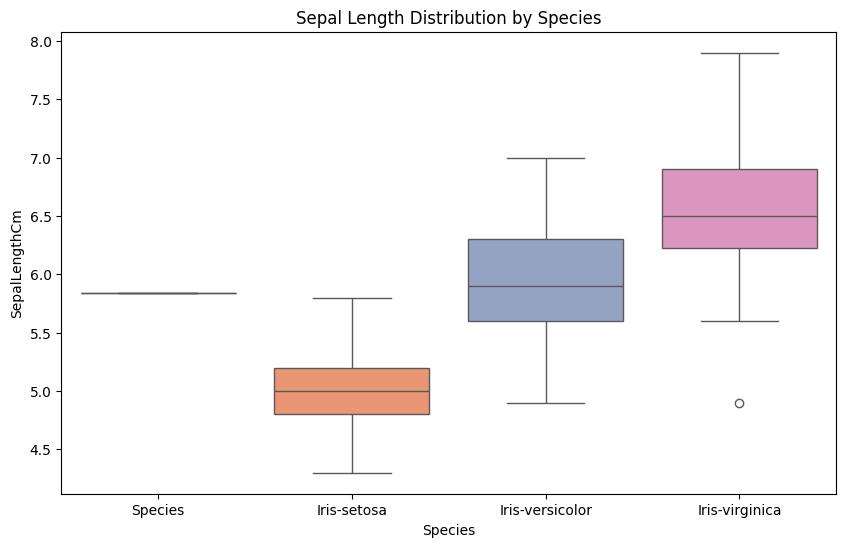

In [100]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Species', y='SepalLengthCm', data=flowers, palette='Set2')
plt.title("Sepal Length Distribution by Species")
plt.show()


/tmp/ipython-input-3640991952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, data=flowers, palette='Pastel1')


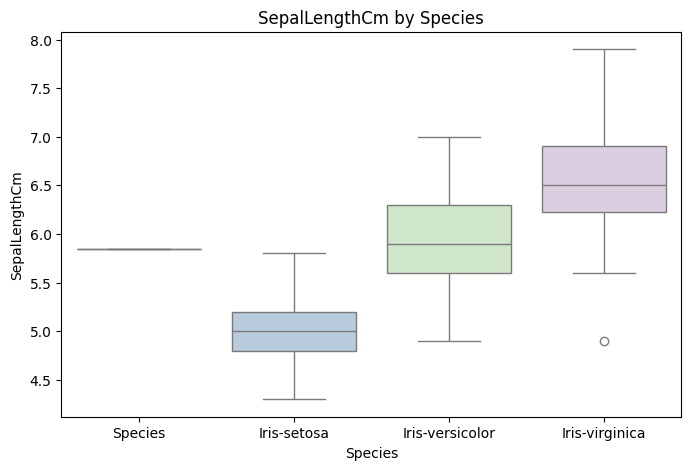

/tmp/ipython-input-3640991952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, data=flowers, palette='Pastel1')


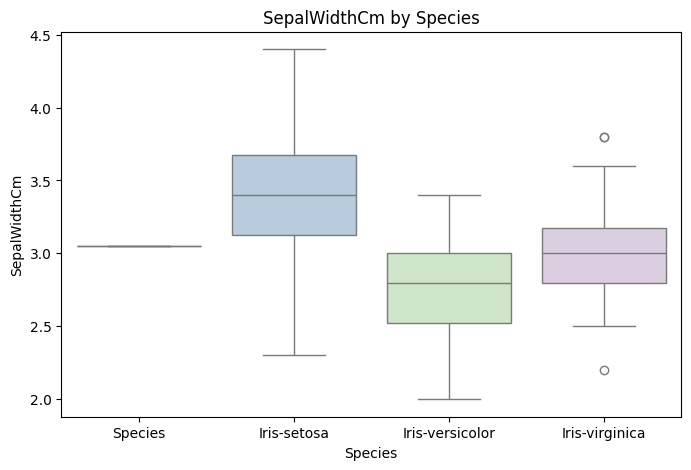

/tmp/ipython-input-3640991952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, data=flowers, palette='Pastel1')


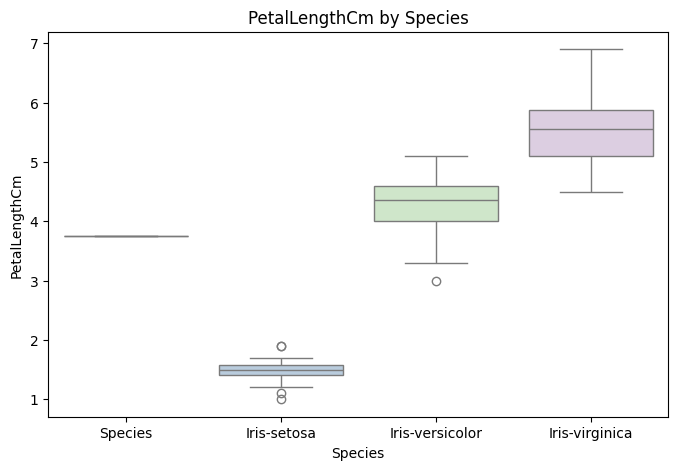

/tmp/ipython-input-3640991952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, data=flowers, palette='Pastel1')


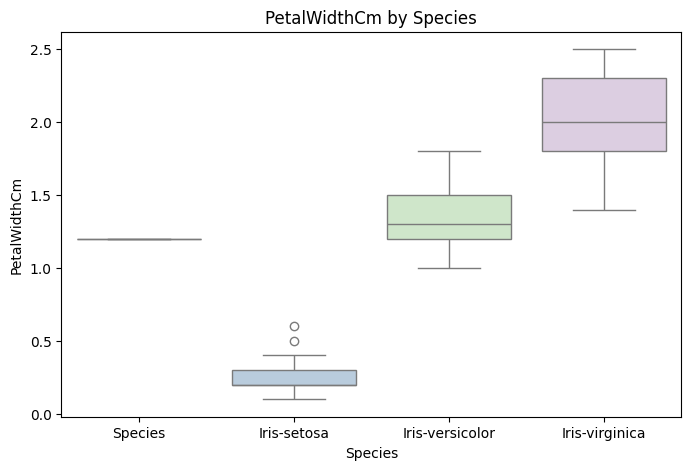

In [101]:
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Species', y=col, data=flowers, palette='Pastel1')
    plt.title(f"{col} by Species")
    plt.show()


/tmp/ipython-input-2122006543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=flowers, palette='Set2', edgecolor='black')


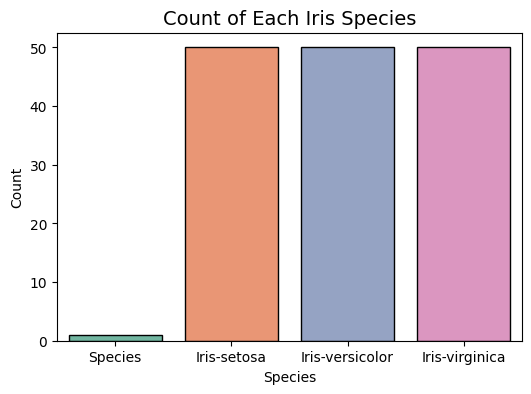

In [102]:
plt.figure(figsize=(6,4))
sns.countplot(x='Species', data=flowers, palette='Set2', edgecolor='black')
plt.title("Count of Each Iris Species", fontsize=14)
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


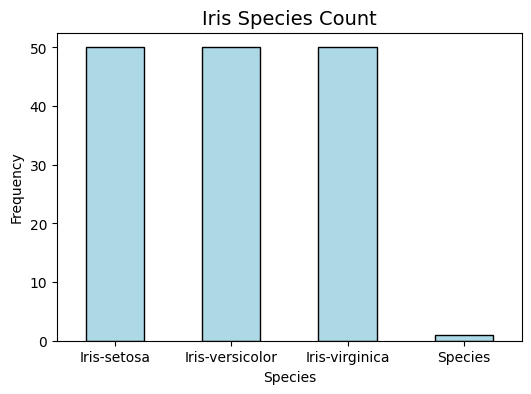

In [103]:
species_counts = flowers['Species'].value_counts()

plt.figure(figsize=(6,4))
species_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Iris Species Count", fontsize=14)
plt.xlabel("Species")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()


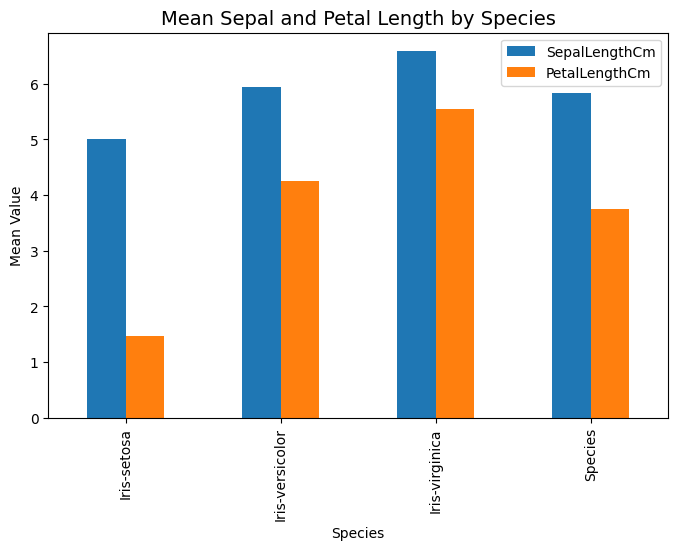

In [104]:
flowers.groupby('Species')[['SepalLengthCm', 'PetalLengthCm']].mean().plot(kind='bar', figsize=(8,5))
plt.title("Mean Sepal and Petal Length by Species", fontsize=14)
plt.ylabel("Mean Value")
plt.show()


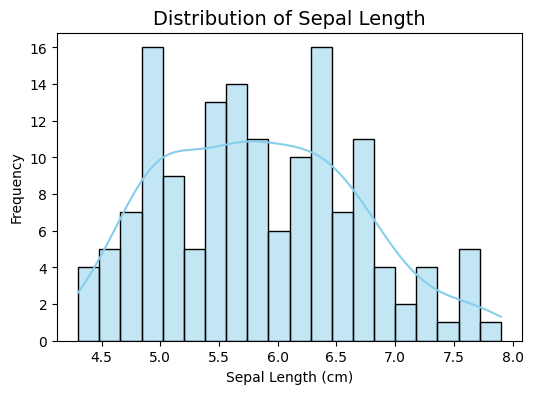

In [105]:
  plt.figure(figsize=(6,4))
sns.histplot(flowers['SepalLengthCm'], kde=True, color='skyblue', bins=20)
plt.title("Distribution of Sepal Length", fontsize=14)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()


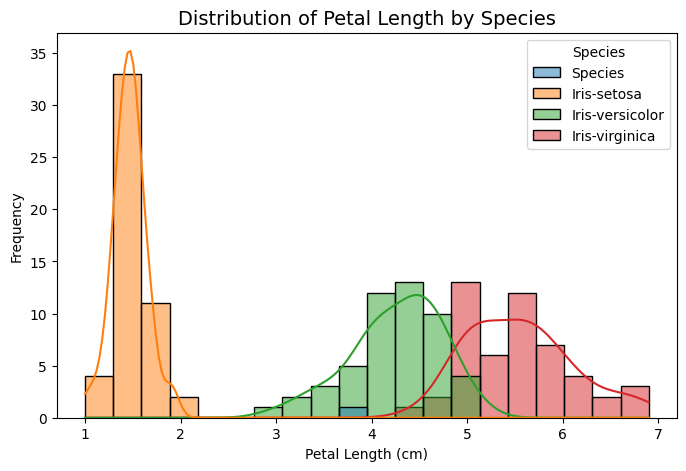

In [106]:
plt.figure(figsize=(8,5))
sns.histplot(data=flowers, x='PetalLengthCm', hue='Species', kde=True, bins=20)
plt.title("Distribution of Petal Length by Species", fontsize=14)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.show()


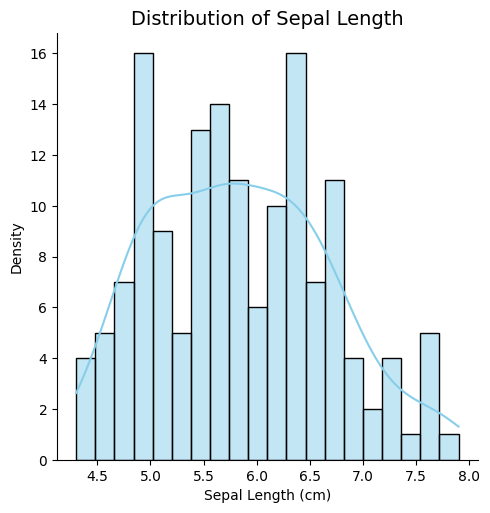

In [107]:
sns.displot(flowers['SepalLengthCm'], kde=True, color='skyblue', bins=20)
plt.title("Distribution of Sepal Length", fontsize=14)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Density")
plt.show()


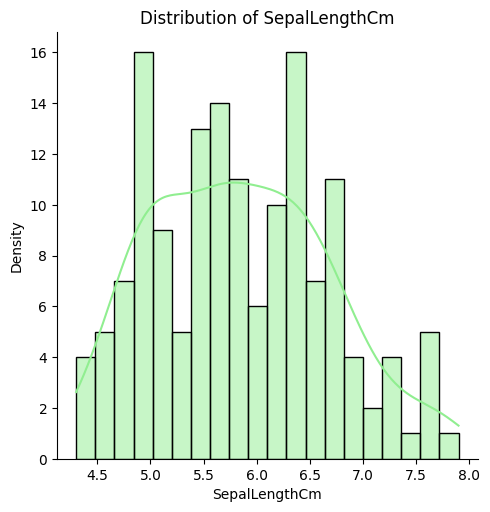

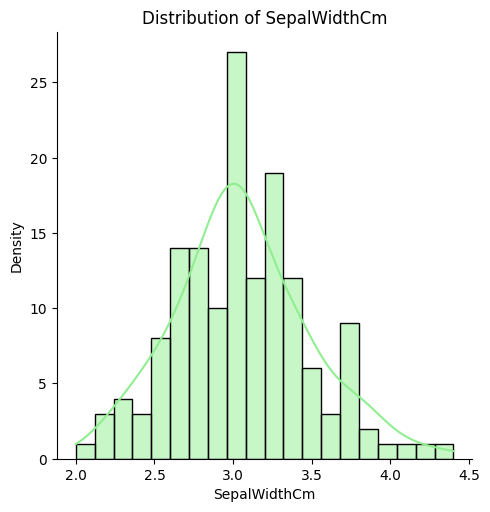

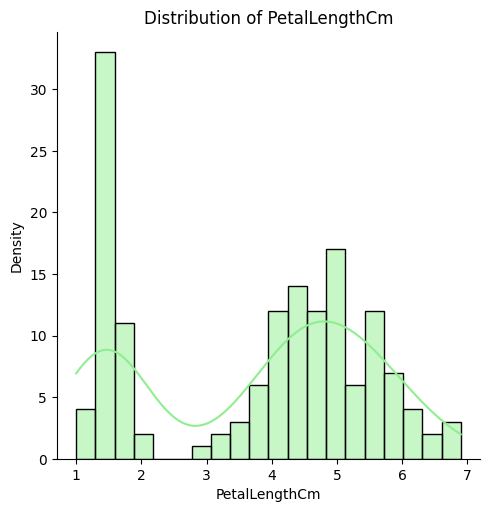

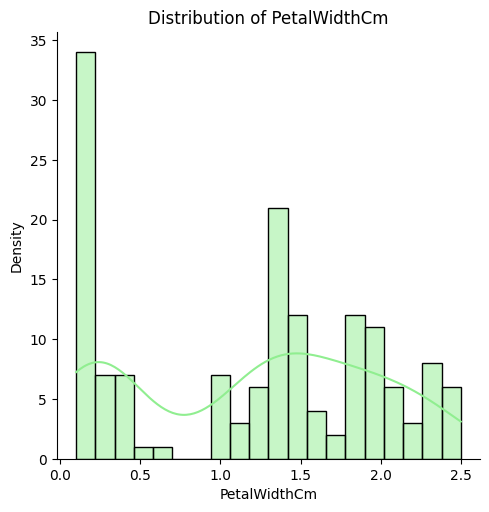

In [108]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in numeric_cols:
    sns.displot(flowers[col], kde=True, color='lightgreen', bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


/tmp/ipython-input-1558604422.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=flowers, x='PetalLengthCm', hue='Species', fill=True)


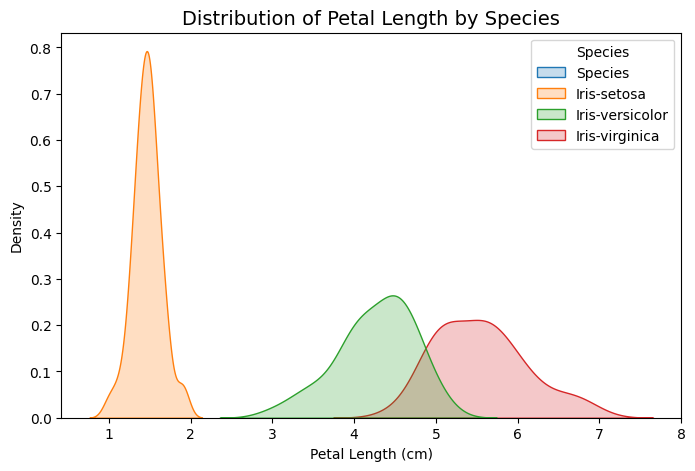

In [109]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=flowers, x='PetalLengthCm', hue='Species', fill=True)
plt.title("Distribution of Petal Length by Species", fontsize=14)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Density")
plt.show()


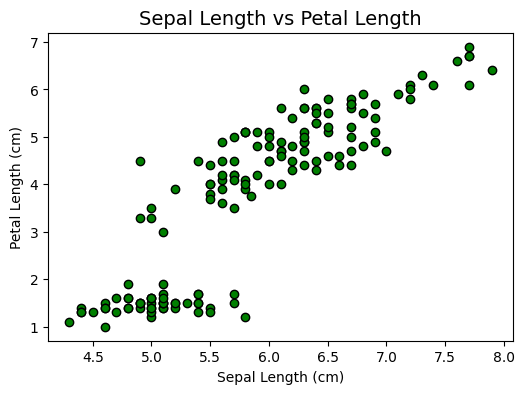

In [110]:
plt.figure(figsize=(6,4))
plt.scatter(flowers['SepalLengthCm'], flowers['PetalLengthCm'], color='green', edgecolor='black')
plt.title("Sepal Length vs Petal Length", fontsize=14)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.show()


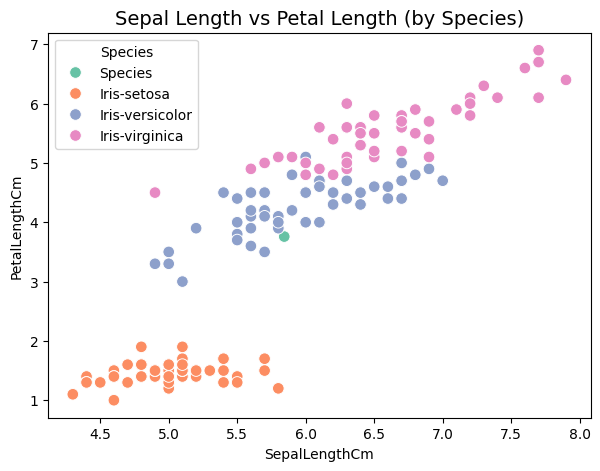

In [111]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=flowers, palette='Set2', s=70)
plt.title("Sepal Length vs Petal Length (by Species)", fontsize=14)
plt.show()


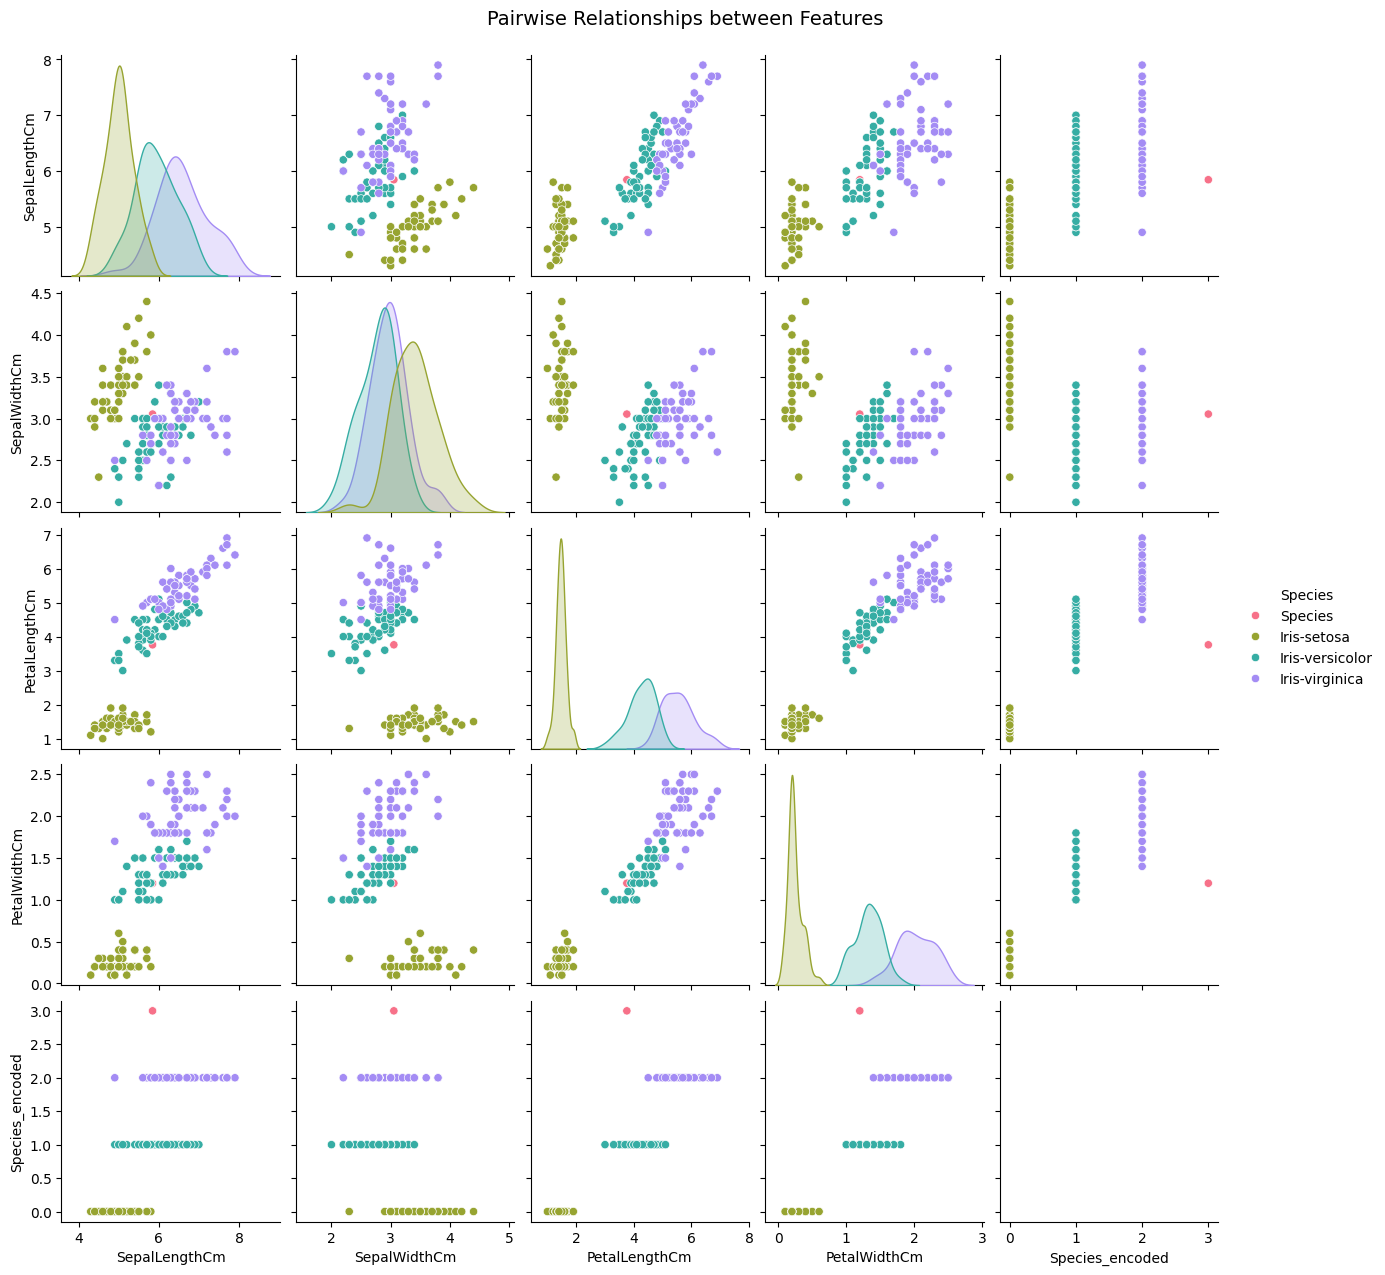

In [112]:
sns.pairplot(flowers, hue='Species', diag_kind='kde', palette='husl')
plt.suptitle("Pairwise Relationships between Features", y=1.02, fontsize=14)
plt.show()


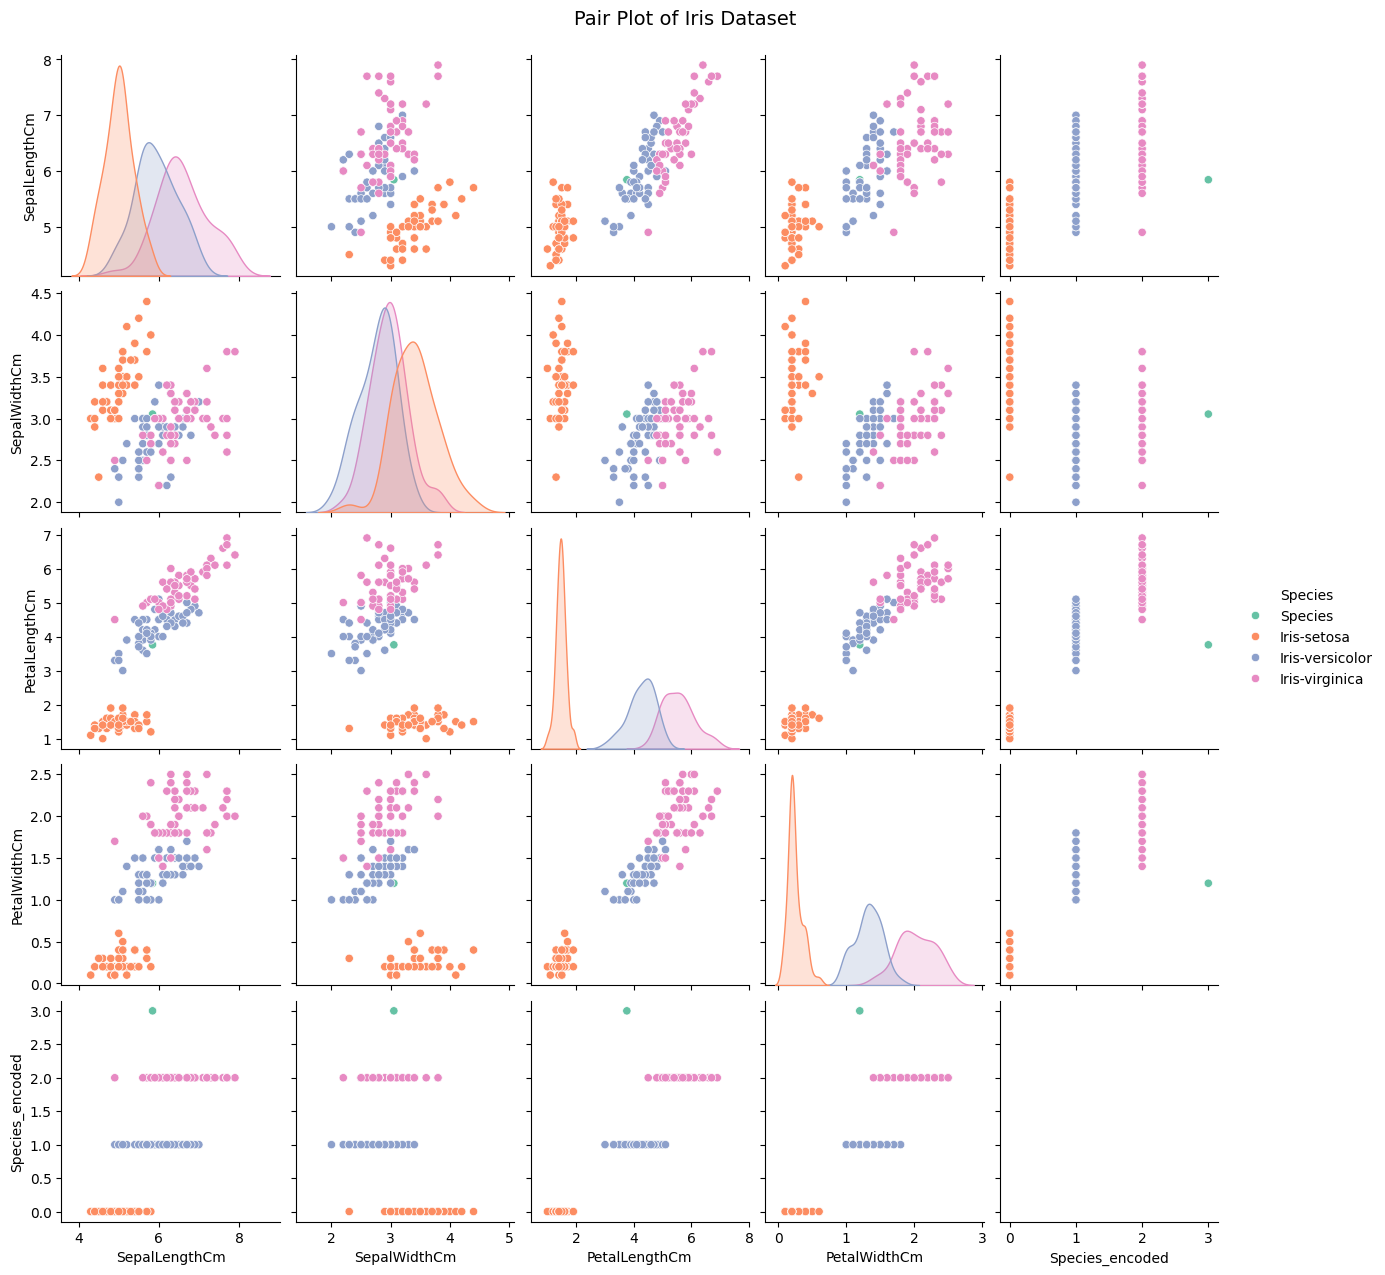

In [113]:
sns.pairplot(flowers, hue='Species', diag_kind='kde', palette='Set2')
plt.suptitle("Pair Plot of Iris Dataset", y=1.02, fontsize=14)
plt.show()


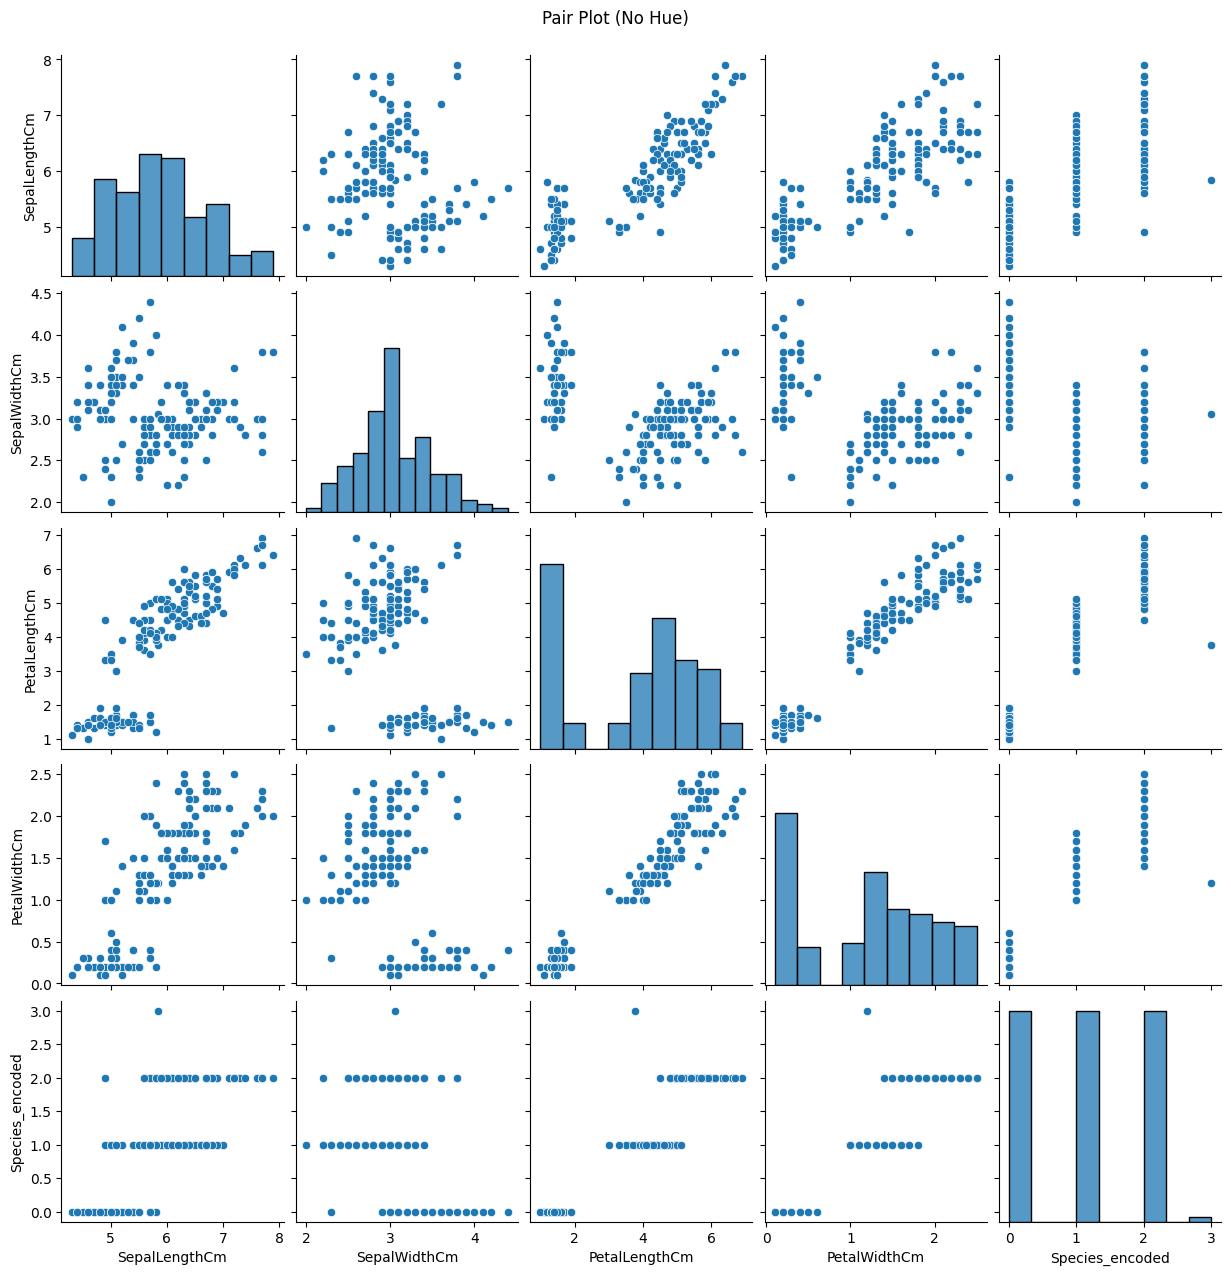

In [114]:
sns.pairplot(flowers)
plt.suptitle("Pair Plot (No Hue)", y=1.02)
plt.show()


In [117]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

corr_matrix = flowers[numeric_cols].corr()
print("Correlation Matrix:\n")
print(corr_matrix)


Correlation Matrix:

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


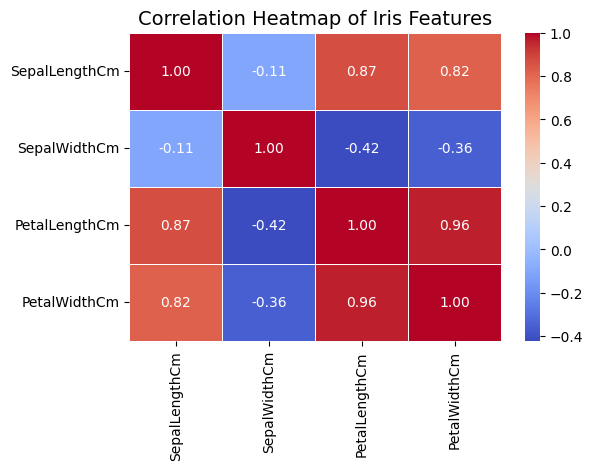

In [118]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Iris Features", fontsize=14)
plt.show()


In [119]:
grouped_data = flowers.groupby('Species')[['SepalLengthCm', 'PetalLengthCm', 'SepalWidthCm', 'PetalWidthCm']].mean()
print(grouped_data)


                 SepalLengthCm  PetalLengthCm  SepalWidthCm  PetalWidthCm
Species                                                                  
Iris-setosa           5.006000       1.464000         3.418      0.244000
Iris-versicolor       5.936000       4.260000         2.770      1.326000
Iris-virginica        6.588000       5.552000         2.974      2.026000
Species               5.843333       3.758667         3.054      1.198667


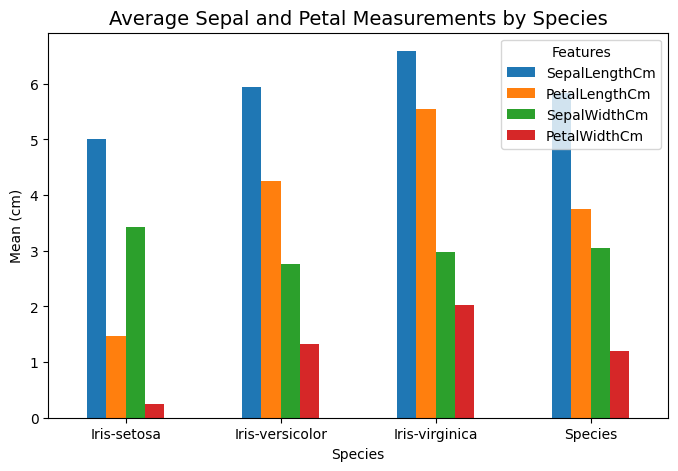

In [120]:
grouped_data.plot(kind='bar', figsize=(8,5))
plt.title("Average Sepal and Petal Measurements by Species", fontsize=14)
plt.ylabel("Mean (cm)")
plt.xlabel("Species")
plt.xticks(rotation=0)
plt.legend(title="Features")
plt.show()


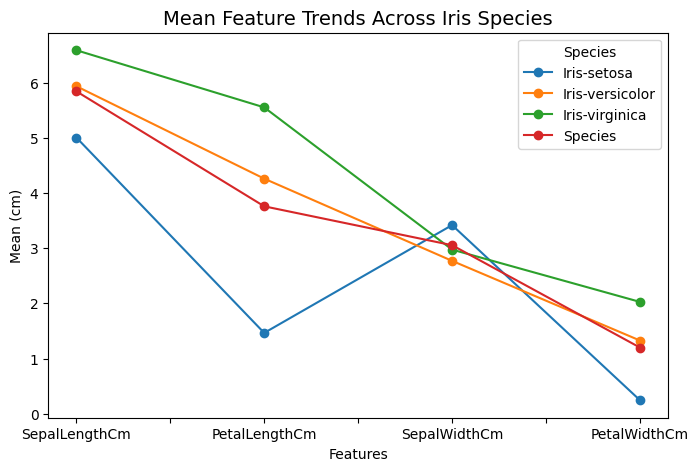

In [121]:
grouped_data.T.plot(kind='line', marker='o', figsize=(8,5))
plt.title("Mean Feature Trends Across Iris Species", fontsize=14)
plt.ylabel("Mean (cm)")
plt.xlabel("Features")
plt.legend(title="Species")
plt.show()


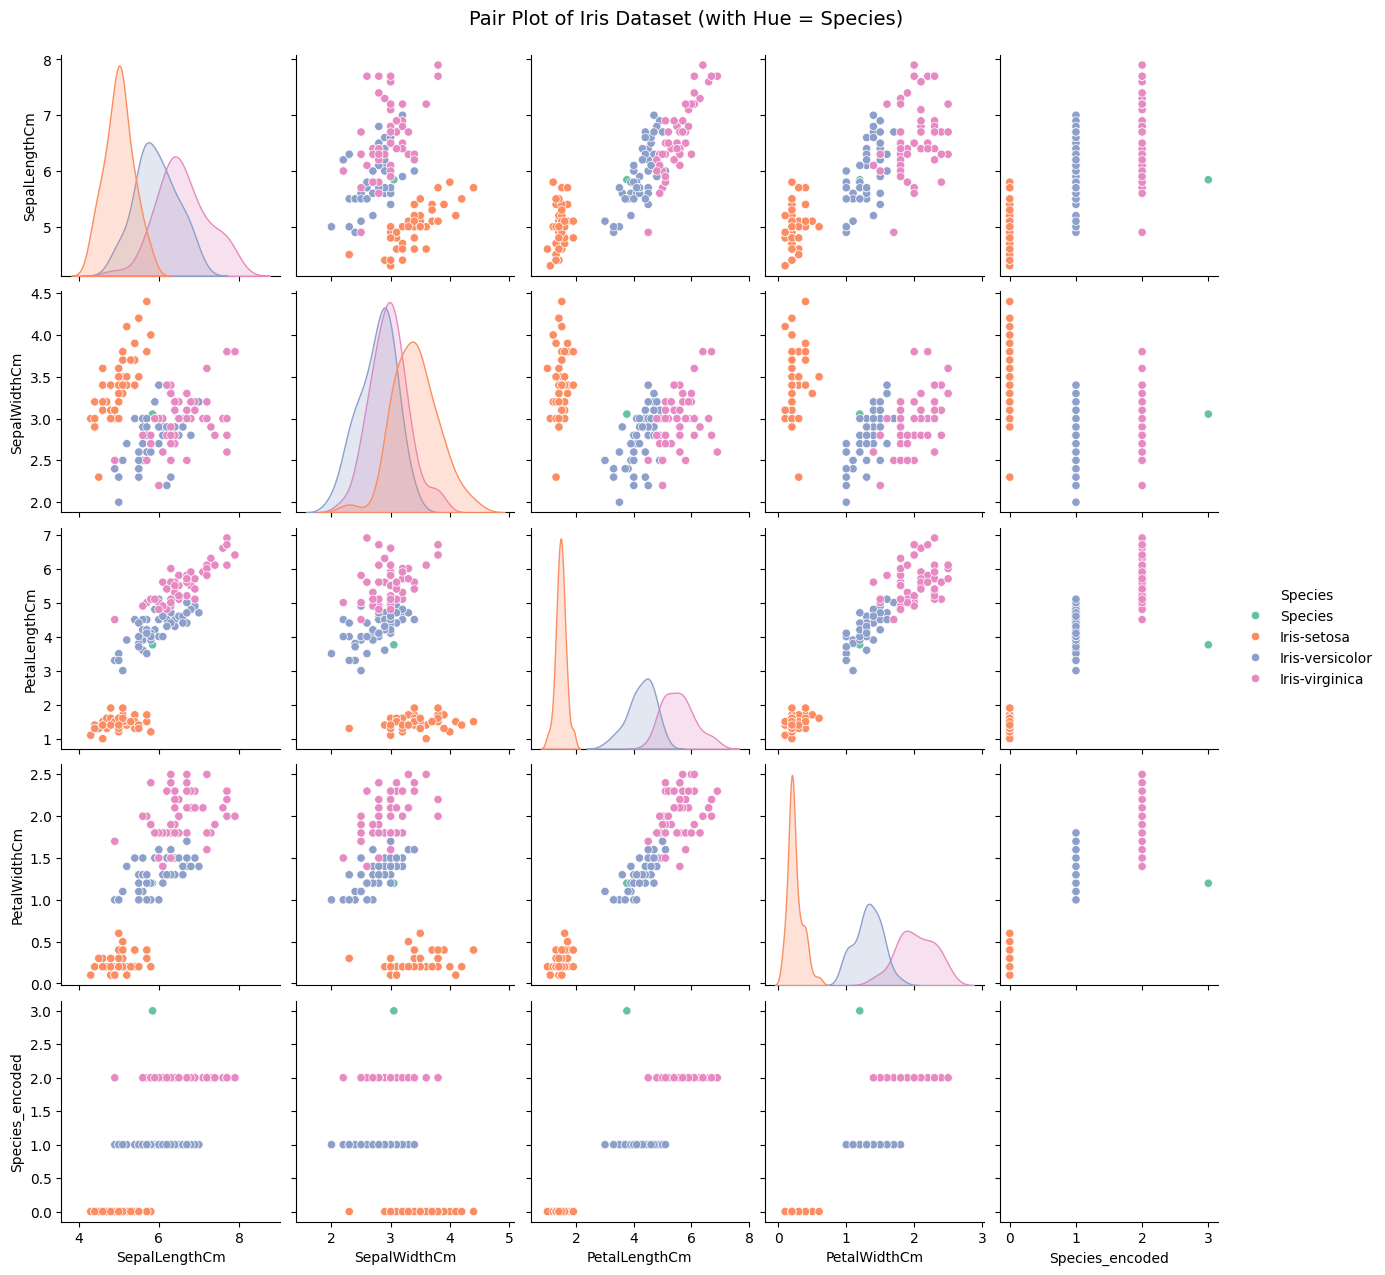

In [122]:
sns.pairplot(flowers, hue='Species', diag_kind='kde', palette='Set2')
plt.suptitle("Pair Plot of Iris Dataset (with Hue = Species)", y=1.02, fontsize=14)
plt.show()


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) th

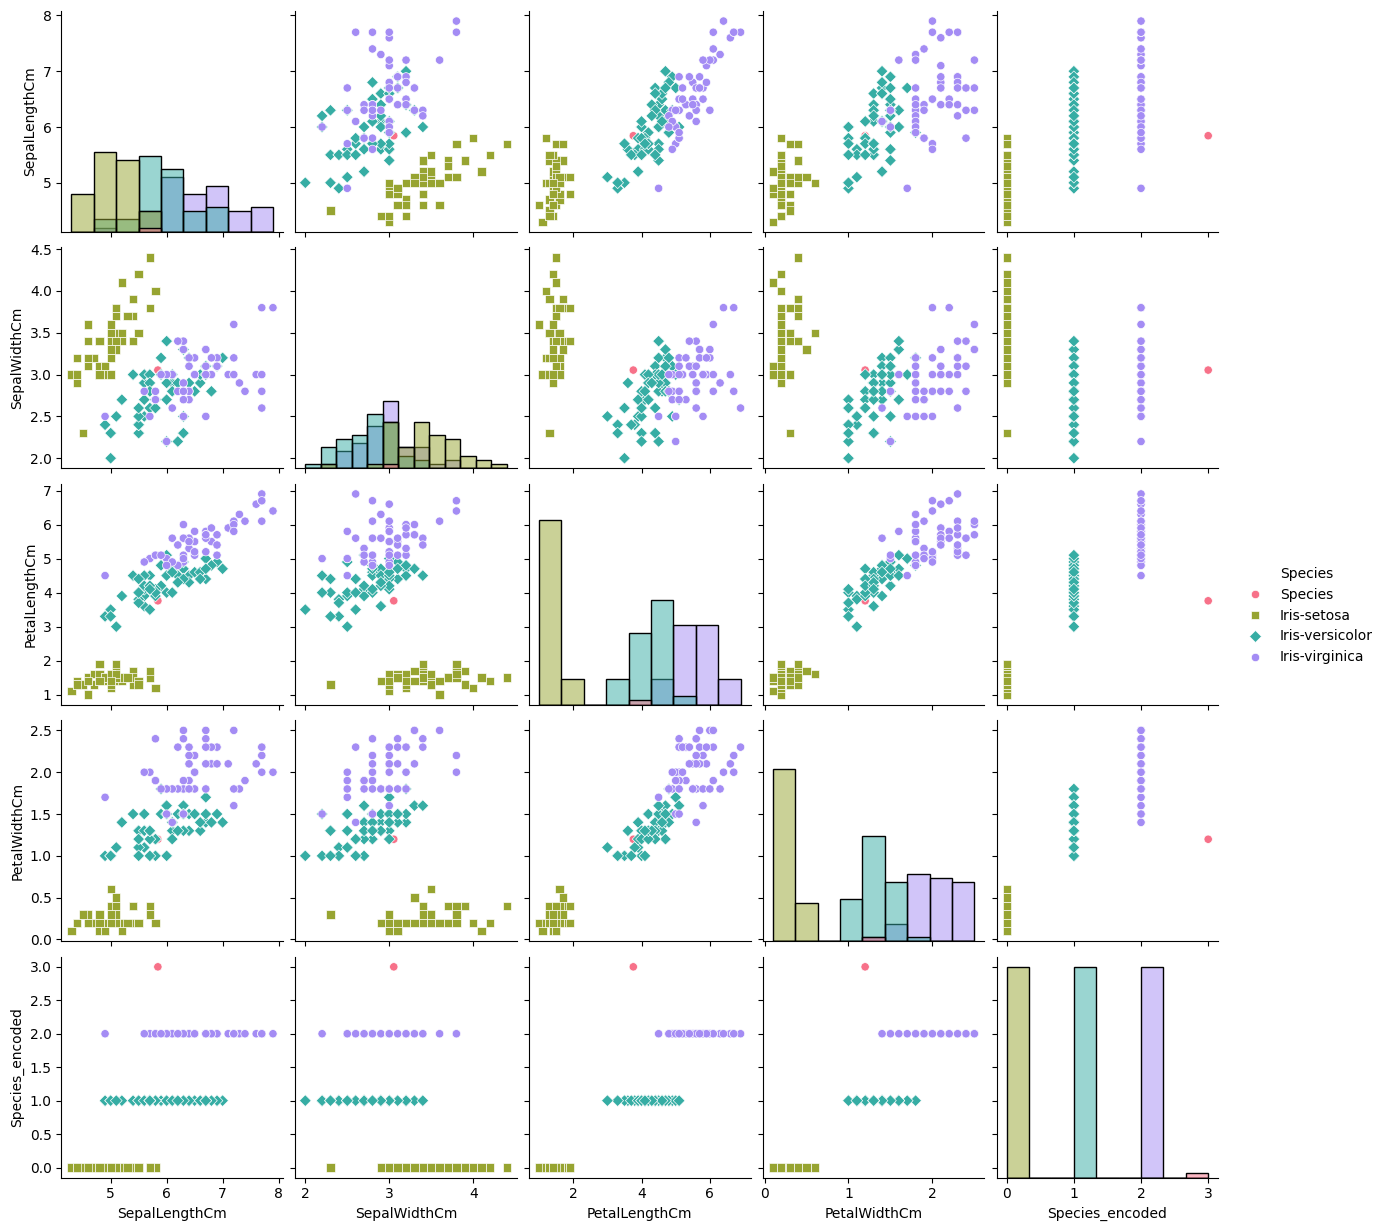

In [123]:
sns.pairplot(flowers, hue='Species', diag_kind='hist', palette='husl', markers=["o", "s", "D"])
plt.show()


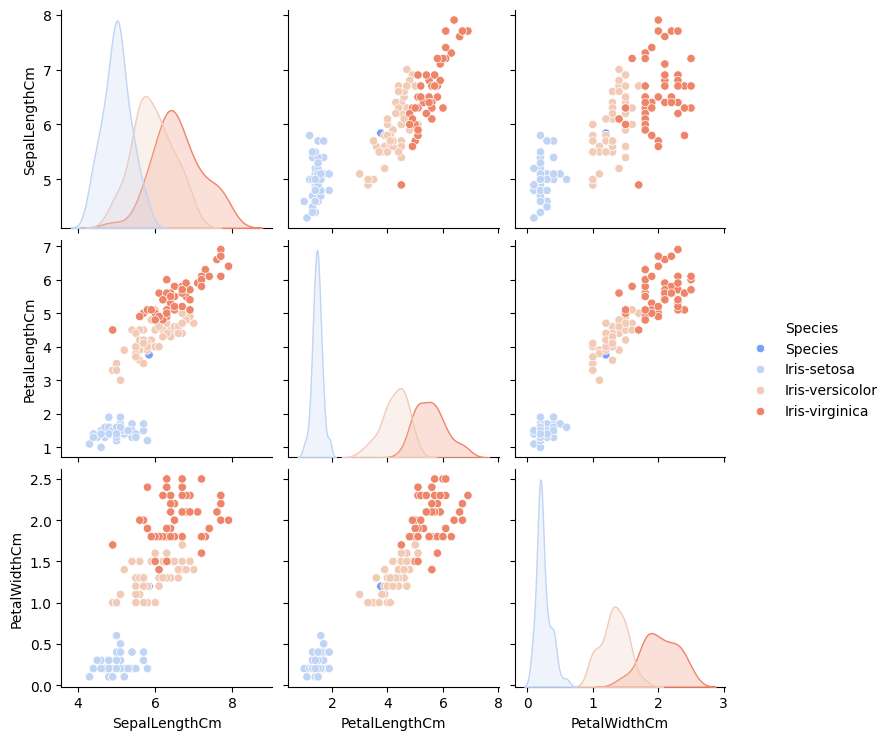

In [124]:
sns.pairplot(flowers, vars=['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'], hue='Species', palette='coolwarm')
plt.show()


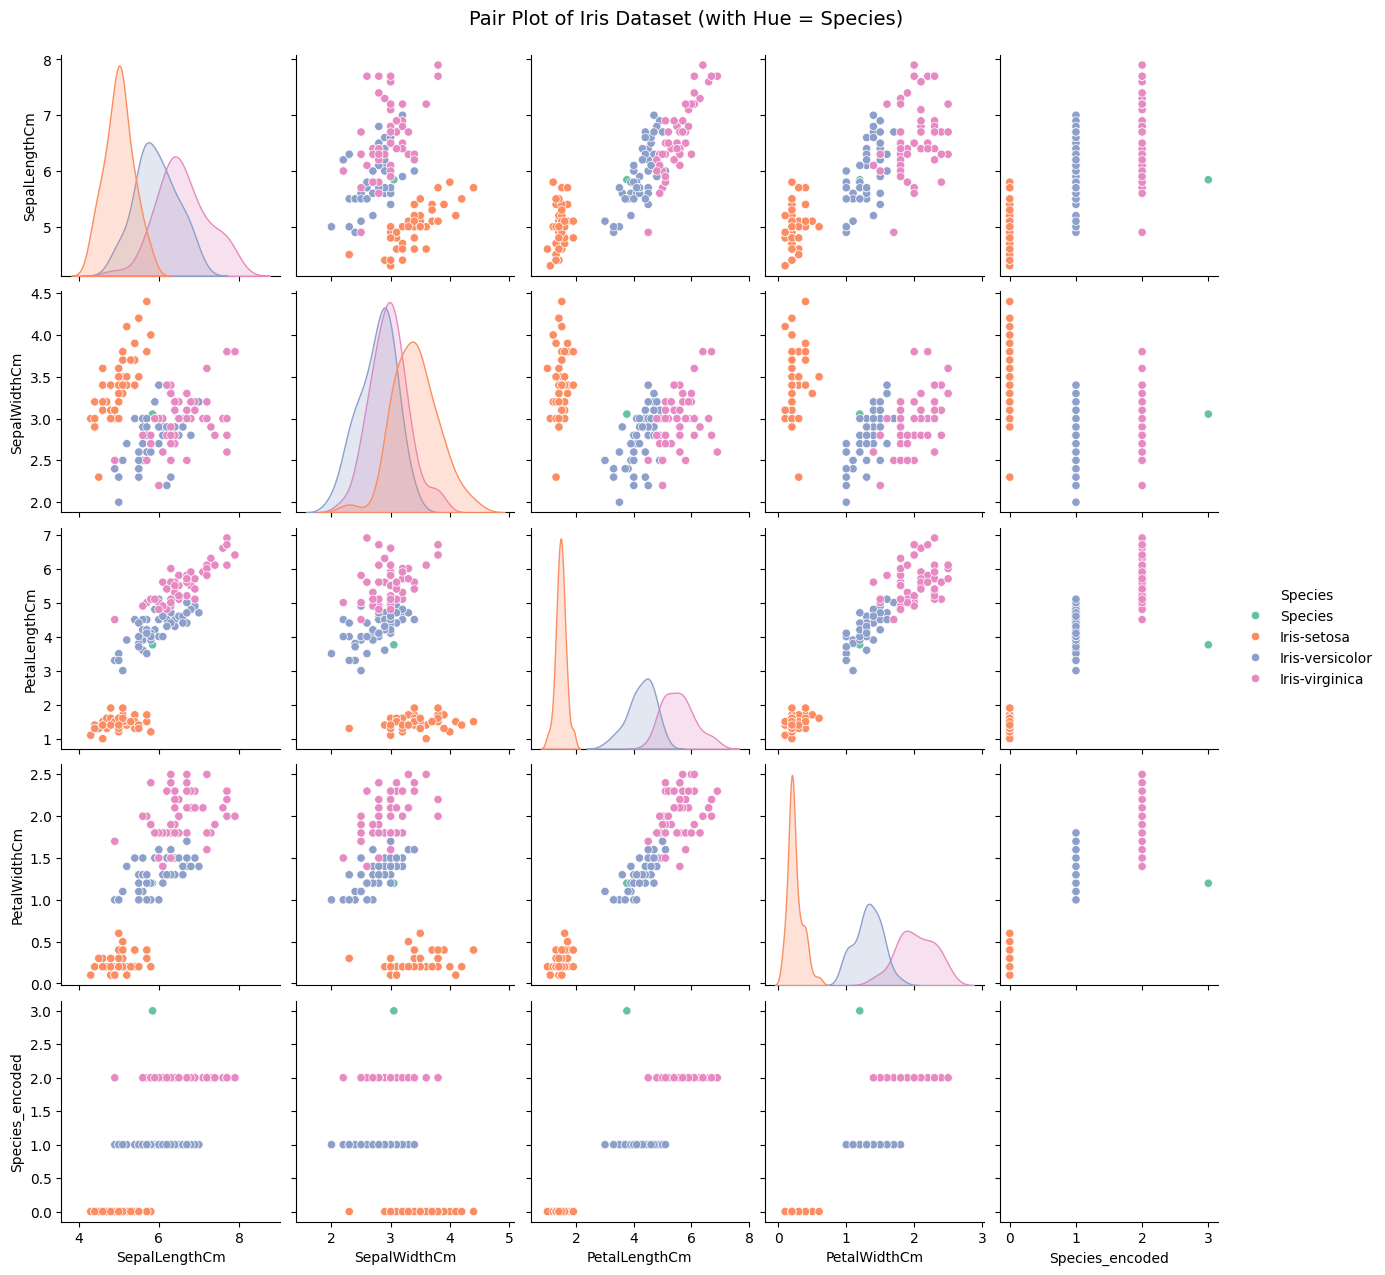

In [125]:
sns.pairplot(flowers, hue='Species', diag_kind='kde', palette='Set2')
plt.suptitle("Pair Plot of Iris Dataset (with Hue = Species)", y=1.02, fontsize=14)
plt.show()


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) th

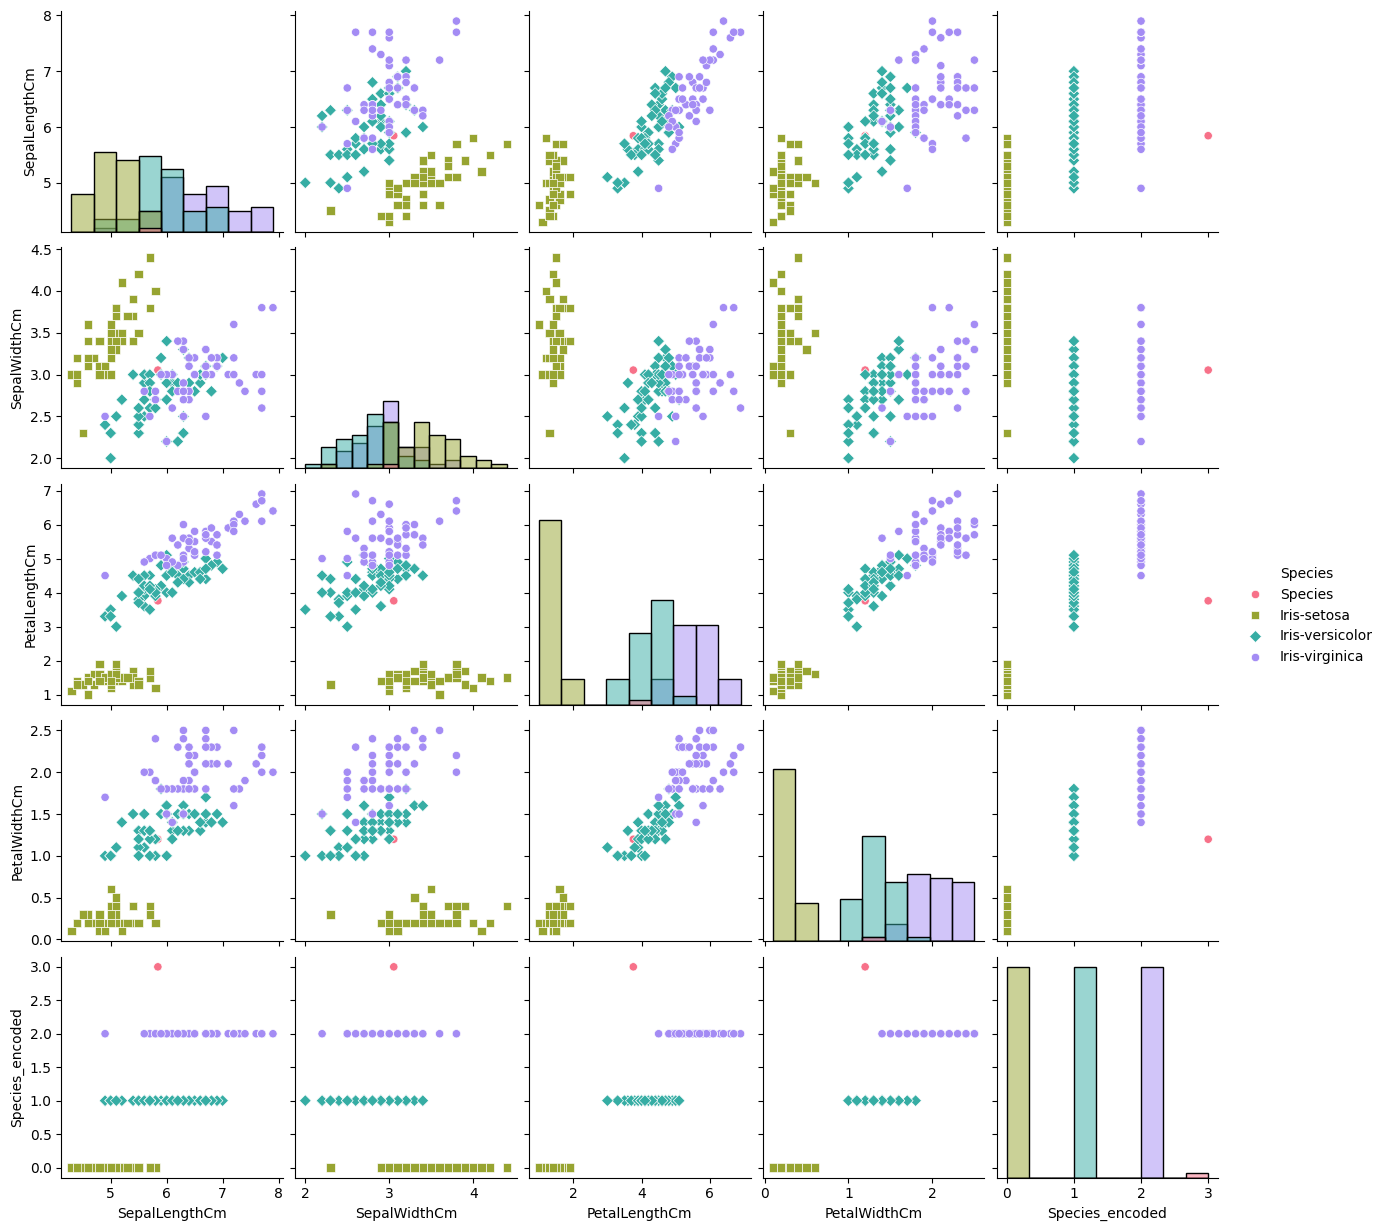

In [126]:
sns.pairplot(flowers, hue='Species', diag_kind='hist', palette='husl', markers=["o", "s", "D"])
plt.show()


In [127]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = flowers[numeric_cols]
y = flowers['Species']


In [128]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)